## Observations and Insights 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [25]:
# Checking the number of mice.
number_of_unique = combined_df["Mouse ID"].nunique()
number_of_unique

249

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_ids["Mouse ID"].unique()[0]

'g989'

In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = combined_df.loc[combined_df["Mouse ID"]=="g989"]
g989


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combine = combined_df.loc[combined_df["Mouse ID"]!="g989"]
clean_combine

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [29]:
# Checking the number of mice in the clean DataFrame.
number_of_unique = clean_combine["Mouse ID"].nunique()
number_of_unique

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_groupby = clean_combine.groupby("Drug Regimen")
clean_mean = clean_groupby.mean()["Tumor Volume (mm3)"]
clean_median = clean_groupby.median()["Tumor Volume (mm3)"]
clean_var = clean_groupby.var()["Tumor Volume (mm3)"]
clean_st_dev = clean_groupby.std()["Tumor Volume (mm3)"]
clean_SEM = clean_groupby.sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"Mean Tumor Vol": clean_mean,
                          "Median Tumor Vol": clean_median,
                          "Variance Tumor Vol": clean_var,
                          "Standard Deviation Tumor Vol": clean_st_dev,
                          "SEM Tumor Vol": clean_SEM})
summary_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean Tumor Vol,Median Tumor Vol,Variance Tumor Vol,Standard Deviation Tumor Vol,SEM Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_ag = clean_combine.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_ag
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Mice per Drug Regimen')

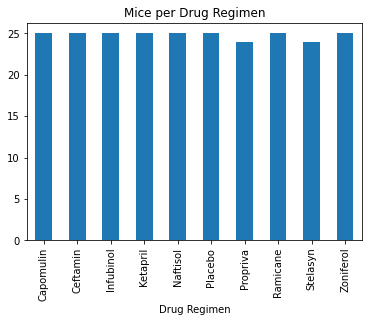

In [32]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_drug_counts = clean_combine[["Drug Regimen", "Mouse ID"]]
mice_drug_counts = mice_drug_counts.groupby("Drug Regimen")["Mouse ID"].nunique()
mice_drug_counts.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.title("Mice per Drug Regimen")

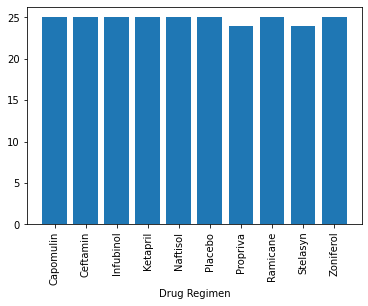

In [33]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_drug_counts = clean_combine[["Drug Regimen", "Mouse ID"]]
mice_drug_counts = mice_drug_counts.groupby("Drug Regimen")["Mouse ID"].nunique()
plt.bar(mice_drug_counts.index, mice_drug_counts)
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.show()

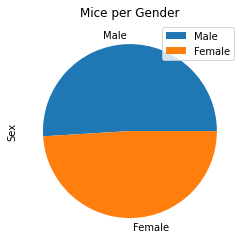

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_drug_counts = clean_combine["Sex"].value_counts()
mice_drug_counts
mice_drug_counts.plot(kind = "pie")
plt.title("Mice per Gender")
plt.legend(loc="best")
plt.startangle = 90
plt.show()


## Quartiles, Outliers and Boxplots

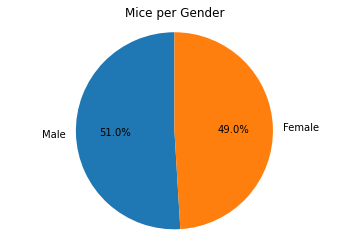

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_drug_counts = clean_combine["Sex"].value_counts()
plt.pie(mice_drug_counts.values, labels=mice_drug_counts.index.values, autopct="%1.1f%%", startangle = 90)
plt.axis("equal")
plt.title ("Mice per Gender")


plt.show()


In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_df = clean_combine.groupby("Mouse ID")["Timepoint"].max()
final_df=final_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = final_df.merge(clean_combine, on = ["Mouse ID", "Timepoint"])
merge_df

merge_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [52]:
tumor_vol = ("Tumor Volume (mm3)")
quartiles = tumor_vol.quartile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumer Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


AttributeError: 'str' object has no attribute 'quartile'

In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
tumor_vol = "Tumor Volume"

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


 # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
for treatment in treatments:
    final_vol = merge_df.loc[merge_df["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
    tumor_vol.append(final_vol)
    
    
    # Determine outliers using upper and lower bounds

    #find the quartile activity use final_vol

AttributeError: 'str' object has no attribute 'quartile'

In [47]:
tumor_vol.type

AttributeError: 'list' object has no attribute 'type'

<function matplotlib.pyplot.show(*args, **kw)>

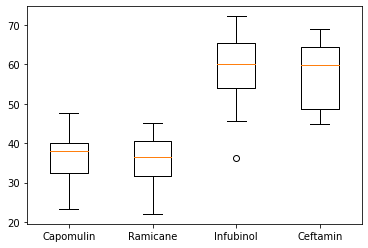

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels = treatments)
plt.show

## Line and Scatter Plots

In [43]:
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumer Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

AttributeError: 'list' object has no attribute 'quantile'

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#pick a mouse that was treated with Capomulin do a .loc filter rows by Capuli and the mouse
#do a .loc for the mouse and one for the Capomulin

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#do a scatter plot for all the mice do a groupby on the Capomulin df from the previous

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#